In [1]:
import numpy as np
from mscs_boost import BootBagClassifier
import matplotlib.pyplot as plt
%matplotlib inline

# Some training and testing data that is easy to visualize

In [2]:
train_x = np.linspace(0.1,10000,10000).reshape(10000,1)
train_y = np.sign(np.sin(np.sqrt(train_x))).astype('int').reshape(10000,)
test_x = np.linspace(0.1,10000,2100).reshape(2100,1)
test_y = np.sign(np.sin(np.sqrt(test_x))).astype('int').reshape(2100,)

# Let's fit a BootBag ensemble of 3-nearest-neighbor models to this data.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knnbag = BootBagClassifier(KNeighborsClassifier,
                          num_bootstraps=5,
                          bootstrap_size=20,
                          rand_seed=2018,
                           model_args={'n_neighbors':3})
knnbag.fit(train_x,train_y)
knnbag.score(test_x, test_y)

0.4704761904761905

#  Let's see a picture.

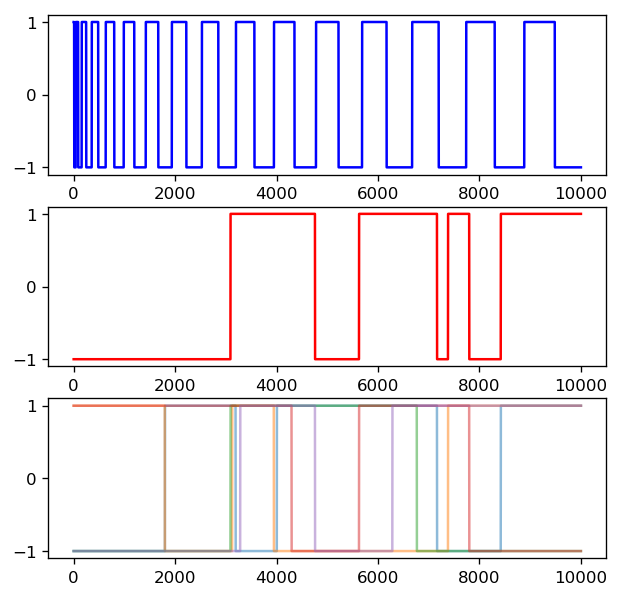

In [12]:
ax,fig = plt.subplots(3,figsize=(6,6), dpi=120)
fig[0].plot(train_x, train_y, color='blue')
fig[1].plot(train_x, knnbag.predict(train_x), color='red')
for m in knnbag._bootstrap_models:
    fig[2].plot(train_x, m.predict(train_x),alpha=0.5)

plt.show(ax)

# Now, let's apply a BootBag ensemble of trees to the same problem.

In [14]:
from sklearn.tree import DecisionTreeClassifier
treebag = BootBagClassifier(DecisionTreeClassifier,
                          num_bootstraps=5,
                          bootstrap_size=20,
                          rand_seed=2018,
                          model_args={'max_depth': 5, 'random_state': 2019})
treebag.fit(train_x,train_y)
treebag.score(test_x, test_y)

0.63

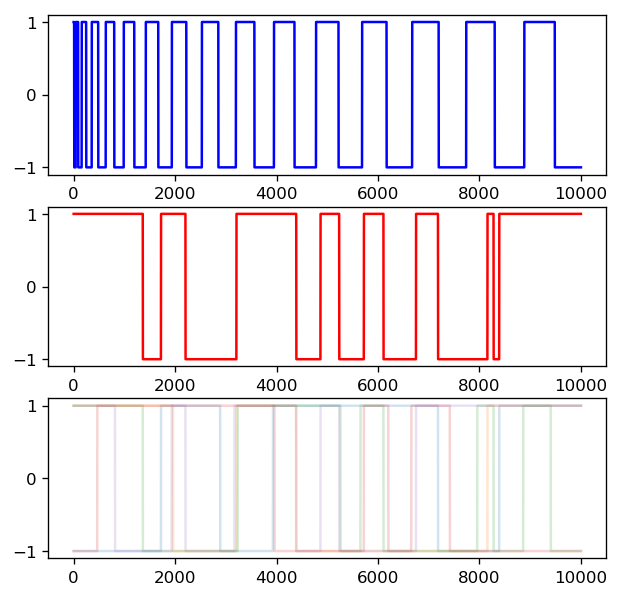

In [15]:
ax,fig = plt.subplots(3,figsize=(6,6), dpi=120)
fig[0].plot(train_x, train_y, color='blue')
fig[1].plot(train_x, treebag.predict(train_x), color='red')
for m in treebag._bootstrap_models:
    fig[2].plot(train_x, m.predict(train_x),alpha=0.2)

plt.show(ax)

